<p style="font-family: Trebuchet MS; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #b20710">🍁 TPS SEPTEMBER 2021 🍂</p>

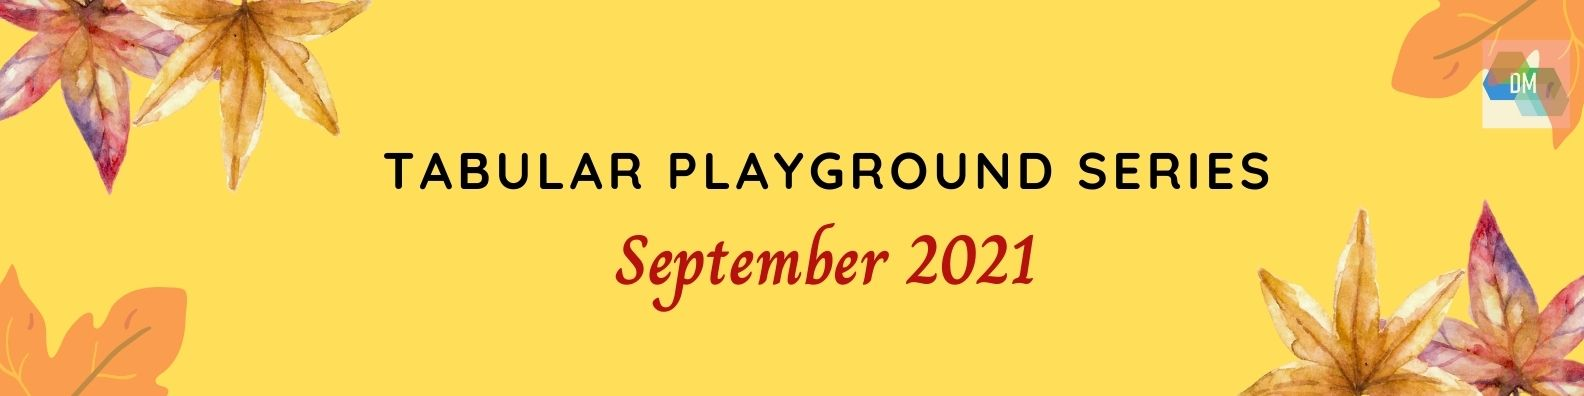

<p style = "font-family: Trebuchet MS; font-size: 16px; color: rgba(0,0,0,.7)"> Observations on this TPS: <li>1. 'claim' column is the target variable </li> <li>2. Train dataset has 957,919 rows and 120 columns</li><li>3. Test dataset has 493,474 rows and 119 columns</li><li>4. In train dataset, every feature has nearly 15,000 missing values totalling 1,820,782 in all</li><li>5. In test dataset, every feature has almost 7,800 missing values totalling 936,218 in all</li></p>

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
df_train= pd.read_csv("../input/tabular-playground-series-sep-2021/train.csv")
df_test= pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv")
df_subm= pd.read_csv("../input/tabular-playground-series-sep-2021/sample_solution.csv")

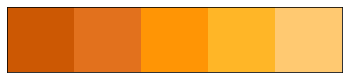

In [3]:
#Custom Color Palette 🎨
custom_colors = ["#CC5803","#E2711D","#FF9505","#FFB627","#FFC971"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [4]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows (Train):', df_train_row_count)
print('Total number of columns (Train):', df_train_column_count)

Total number of rows (Train): 957919
Total number of columns (Train): 120


In [5]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows (Test):', df_test_row_count)
print('Total number of columns (Test):', df_test_column_count)

Total number of rows (Test): 493474
Total number of columns (Test): 119


In [6]:
df_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,957919.0,4.789590e+05,2.765275e+05,0.000000e+00,2.394795e+05,4.789590e+05,7.184385e+05,9.579180e+05
f1,942672.0,9.020086e-02,4.356374e-02,-1.499100e-01,7.022700e-02,9.013500e-02,1.165000e-01,4.151700e-01
f2,942729.0,3.459637e-01,1.462507e-01,-1.904400e-02,2.830500e-01,3.891000e-01,4.584500e-01,5.189900e-01
f3,942428.0,4.068744e+03,6.415829e+03,-9.421700e+03,4.184300e+02,1.279500e+03,4.444400e+03,3.954400e+04
f4,942359.0,2.012140e-01,2.125103e-01,-8.212200e-02,3.508650e-02,1.370000e-01,2.971000e-01,1.319900e+00
...,...,...,...,...,...,...,...,...
f115,942360.0,1.208876e+00,1.149588e-01,9.052700e-01,1.146800e+00,1.177200e+00,1.242000e+00,1.886700e+00
f116,942330.0,4.276905e+16,6.732441e+16,-8.944400e+15,2.321100e+14,1.327500e+16,5.278700e+16,3.249900e+17
f117,942512.0,3.959205e+03,3.155992e+03,-4.152400e+02,1.306200e+03,3.228000e+03,6.137900e+03,1.315100e+04
f118,942707.0,5.592672e-01,4.084261e-01,-1.512400e-01,2.765600e-01,4.734400e-01,7.462100e-01,2.743600e+00


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Columns: 120 entries, id to claim
dtypes: float64(118), int64(2)
memory usage: 877.0 MB


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,493474.0,1.204656e+06,1.424538e+05,9.579190e+05,1.081287e+06,1.204656e+06,1.328024e+06,1.451392e+06
f1,485662.0,9.019114e-02,4.353777e-02,-1.531900e-01,7.021100e-02,9.017300e-02,1.165075e-01,4.129000e-01
f2,485583.0,3.461425e-01,1.458888e-01,-1.906000e-02,2.836600e-01,3.889400e-01,4.583100e-01,5.198800e-01
f3,485679.0,4.047202e+03,6.383225e+03,-9.436300e+03,4.188350e+02,1.277900e+03,4.421400e+03,3.984100e+04
f4,485741.0,2.015029e-01,2.125533e-01,-8.071600e-02,3.516900e-02,1.373500e-01,2.971600e-01,1.310200e+00
...,...,...,...,...,...,...,...,...
f114,485532.0,6.305129e+04,9.227903e+04,-8.138100e+04,2.474875e+03,1.942900e+04,8.830950e+04,5.215400e+05
f115,485497.0,1.209049e+00,1.150736e-01,9.007000e-01,1.146800e+00,1.177200e+00,1.242300e+00,1.877900e+00
f116,485391.0,4.284258e+16,6.743966e+16,-7.749400e+15,2.317850e+14,1.330400e+16,5.284700e+16,3.239500e+17
f117,485711.0,3.968586e+03,3.161273e+03,-4.162400e+02,1.310000e+03,3.237100e+03,6.157300e+03,1.319800e+04


<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [10]:
df_train.isna().sum()

id           0
f1       15247
f2       15190
f3       15491
f4       15560
         ...  
f115     15559
f116     15589
f117     15407
f118     15212
claim        0
Length: 120, dtype: int64

In [11]:
df_test.isna().sum()

id         0
f1      7812
f2      7891
f3      7795
f4      7733
        ... 
f114    7942
f115    7977
f116    8083
f117    7763
f118    7885
Length: 119, dtype: int64

In [12]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 id       957919
f1       147965
f2       117427
f3       274624
f4       265618
          ...  
f115      12970
f116     336136
f117     200080
f118     164263
claim         2
Length: 120, dtype: int64


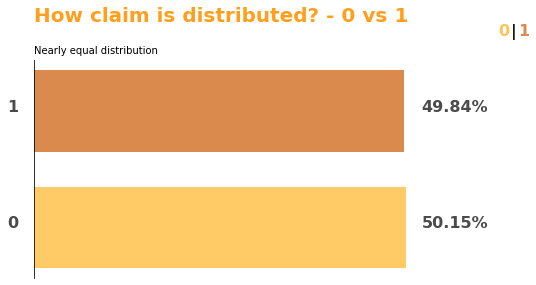

In [13]:
x = df_train['claim'].value_counts()

fig,ax=plt.subplots(figsize=(7,4))
ax.barh([1],x.values[1],height=0.7,color='#CC5803',alpha=0.7)
plt.text(-35000,1, '1', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)
plt.text(500000,1, '49.84%', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)

ax.barh([0],x.values[0],height=0.7,color='#FFB627',alpha=0.7)
plt.text(-35000,0,'0',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(500000,0, '50.15%',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-50,1.77, 'How claim is distributed? - 0 vs 1',{'font': 'Trebuchet MS','weight':'bold','Size': '20','style':'normal', 'color':'#FF9505'}, alpha = 0.9)
plt.text(600000,1.65, '0 ', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#FFB627'},alpha = 0.8)
plt.text(615000,1.65, '|', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.9)
plt.text(625000,1.65, '1',  {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#CC5803'},alpha = 0.7)
plt.text(-50,1.5, 'Nearly equal distribution')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>LightAutoML ⏳</centre></strong></h3>

In [14]:
!pip install lightautoml -q

In [15]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [16]:
task = Task('binary')
roles = {'target': 'claim'}
THREADS = 12
FOLDS = 10
RANDOM = 42
SIZE = 0.2
TIMEOUT = 7200
TARGET = 'claim'

In [17]:
automl = TabularAutoML(task = task, timeout = TIMEOUT, cpu_limit = THREADS,
                       reader_params = {'n_jobs': THREADS, 'cv': FOLDS, 'random_state': RANDOM},verbose = 2 )
pred = automl.fit_predict(df_train, roles = roles)

Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


Start automl preset with listed constraints:
- time: 7200 seconds
- cpus: 12 cores
- memory: 16 gb

Train data shape: (957919, 120)
Feats was rejected during automatic roles guess: []


Layer 1 ...
Train process start. Time left 7156.619448184967 secs
Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...

===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = 0.7105728734598646
Linear model: C = 5e-05 score = 0.7846729924534463
Linear model: C = 0.0001 score = 0.7934846048882312
Linear model: C = 0.0005 score = 0.7983285157640034
Linear model: C = 0.001 score = 0.7985362083260041
Linear model: C = 0.005 score = 0.7986922135794862
Linear model: C = 0.01 score = 0.7986922135794862
Linear model: C = 0.05 score = 0.7986922135794862

===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = 0.7168828539024622
Linear model: C = 5e-05 score = 0.7855779562711533
Linear model: C = 0.0001 score = 0.7935811484422

Time limit exceeded after calculating fold 1


Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
Optuna may run 1 secs
Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 100 rounds
[100]	valid's auc: 0.805156
[200]	valid's auc: 0.807799
[300]	valid's auc: 0.808527
[400]	valid's auc: 0.808348
Early stopping, best iteration is:
[366]	valid's auc: 0.808566
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 100 rounds
[100]	valid's auc: 0.805156
[200]	valid's auc: 0.807799
[300]	valid's auc: 0.808527
[400]	valid's auc: 0.808348
Early stopping, best iteration is:
[366]	valid's auc: 0.808566

===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 100 rounds
[100]	valid'

Time limit exceeded after calculating fold 4


Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====

0:	test: 0.5378023	best: 0.5378023 (0)	total: 303ms	remaining: 15m 8s
100:	test: 0.7947577	best: 0.7948642 (76)	total: 20s	remaining: 9m 32s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7948642159
bestIteration = 76

Shrink model to first 77 iterations.

===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_2_CatBoost =====

0:	test: 0.5376168	best: 0.5376168 (0)	total: 218ms	remaining: 10m 54s
100:	test: 0.7937053	best: 0.7941652 (59)	total: 20.1s	remaining: 9m 36s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7941651654
bestIteration = 59

Shrink model to first 60 iterations.

===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_2_CatBoost =====

0:	test: 0.5363226	best: 0.5363226 (0)	total: 211ms	remaining: 10m 32s
100:	test: 0.7962105	best: 0.7964354 (88)	total

Time limit exceeded after calculating fold 6


2999:	test: 0.8041876	best: 0.8042044 (2906)	total: 10m 35s	remaining: 0us

bestTest = 0.8042043988
bestIteration = 2906

Shrink model to first 2907 iterations.
Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed
Optuna may run 1 secs
Start fitting Lvl_0_Pipe_1_Mod_3_CatBoost ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_CatBoost =====

0:	test: 0.5307650	best: 0.5307650 (0)	total: 173ms	remaining: 8m 39s
100:	test: 0.7949321	best: 0.7950463 (81)	total: 17.7s	remaining: 8m 27s
200:	test: 0.7946904	best: 0.7950607 (108)	total: 35.5s	remaining: 8m 14s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7950607084
bestIteration = 108

Shrink model to first 109 iterations.
Lvl_0_Pipe_1_Mod_3_CatBoost fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_3_CatBoost ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_CatBoost =====

0:	test: 0.5307650	best: 0.5307650 (0)	total: 163ms	remaining: 8m 10s
100:	test: 0.7947406	best: 0.7947

Time limit exceeded in one of the tasks. AutoML will blend level 1 models.


Blending: Optimization starts with equal weights and score 0.7987658948135581
Blending, iter 0: score = 0.7998284679529557, weights = [0.65388834 0.12808572 0.12769015 0.09033575 0.        ]
Blending, iter 1: score = 0.8000029159597278, weights = [0.46888304 0.115915   0.2934437  0.12175829 0.        ]
Blending, iter 2: score = 0.8000079015478769, weights = [0.50439274 0.08083869 0.29575524 0.11901329 0.        ]
Blending, iter 3: score = 0.8000079176703624, weights = [0.5050944  0.08072425 0.2953365  0.11884478 0.        ]
Blending, iter 4: score = 0.8000079180190977, weights = [0.50511974 0.08072013 0.29532143 0.11883873 0.        ]

Automl preset training completed in 4692.32 seconds.


In [18]:
pred = automl.predict(df_test)

In [19]:
df_subm['claim'] = pred.data[:, 0]
df_subm

,id,claim
0,957919,0.461763
1,957920,0.204594
2,957921,0.447977
3,957922,0.242203
4,957923,0.265757
...,...,...
493469,1451388,0.621512
493470,1451389,0.211993
493471,1451390,0.811972
493472,1451391,0.221661


In [20]:
df_subm.to_csv('/kaggle/working/submission_lightautoml.csv', index=False)

<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>H2O ⏳</centre></strong></h3>

In [21]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0wzf_3c1
  JVM stdout: /tmp/tmp0wzf_3c1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0wzf_3c1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,3 months and 22 days !!!
H2O_cluster_name:,H2O_from_python_unknownUser_60zdz7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [22]:
train = df_train.drop('id',axis=1)
test = df_test.drop('id',axis=1)

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
x = train.columns
y = "claim"
x.remove(y)

aml = H2OAutoML(max_models = 20, nfolds = 5, seed = 1,max_runtime_secs = 800)
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [24]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210911_125059,0.22708,0.476529,0.22708,0.455144,0.334434
StackedEnsemble_BestOfFamily_AutoML_20210911_125059,0.228229,0.477734,0.228229,0.457106,0.335444
DRF_1_AutoML_20210911_125059,0.237003,0.48683,0.237003,0.459984,0.34166
XGBoost_2_AutoML_20210911_125059,0.240738,0.49065,0.240738,0.488063,0.345437
XGBoost_1_AutoML_20210911_125059,0.244961,0.494935,0.244961,0.4939,0.348321
XGBoost_3_AutoML_20210911_125059,0.247487,0.497481,0.247487,0.497013,0.350017
GBM_4_AutoML_20210911_125059,0.248101,0.498097,0.248101,0.497989,0.350291
GBM_3_AutoML_20210911_125059,0.248481,0.498479,0.248481,0.498394,0.350547
GBM_2_AutoML_20210911_125059,0.248671,0.498669,0.248671,0.498594,0.350669
GBM_1_AutoML_20210911_125059,0.248862,0.49886,0.248862,0.498796,0.350799


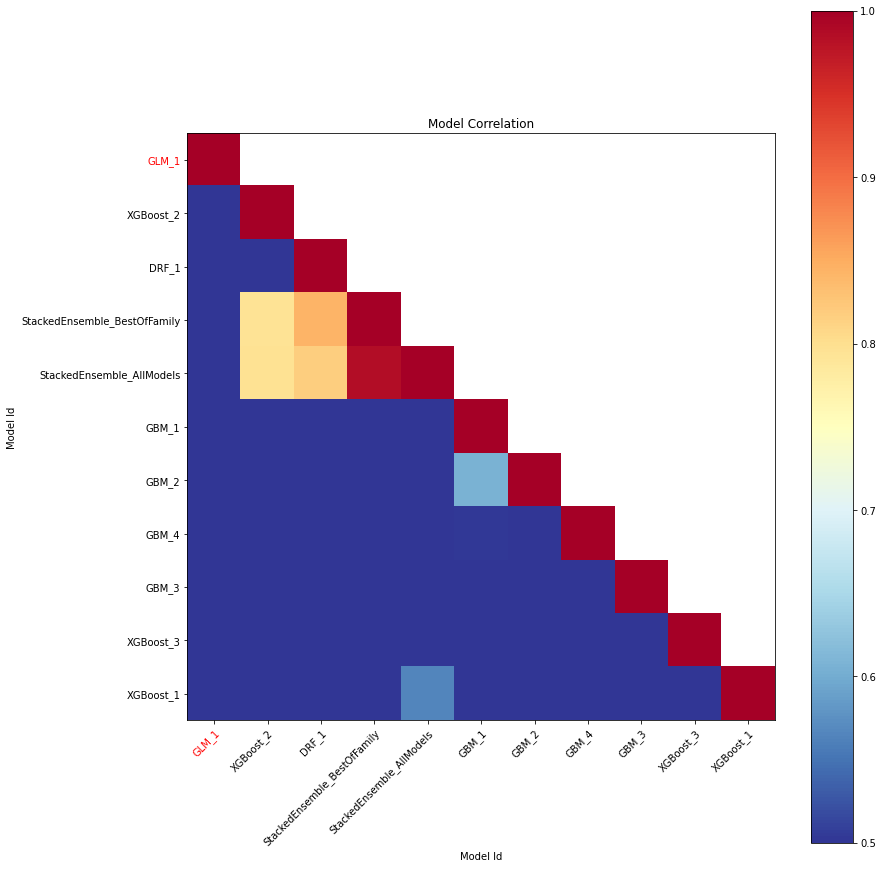

In [25]:
model_plot = aml.model_correlation_heatmap(train)

In [26]:
preds = aml.leader.predict(test)
df_subm['claim'] = h2o.as_list(preds)['predict']
df_subm.to_csv("submission_h2o.csv",index = None)

stackedensemble prediction progress: |████████████████████████████████████| 100%


<h3 style="font-family: Trebuchet MS;background-color:#ffc501;color:brown;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>If you found this notebook useful, please Upvote. Thanks!</centre></strong></h3>